# Initialization

In [ ]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

canais = ["L","A","B"] #color channel
path = "/content/drive/My Drive/Colab Notebooks/flor/flowers"
pasta = {} #folders
arquivo = {} #files

In [ ]:
#create some variables
for canal in canais:
    #path of the folder for each color channel
    pasta[canal] = os.path.join( path + "/{}/".format(canal))
    pasta[canal + "_train"] = os.path.join( path + "/train/{}/".format(canal))
    pasta[canal + "_val"] = os.path.join( path + "/val/{}/".format(canal))

#original images in colors
pasta["original"] = os.path.join( path + "/flowers/")
arquivo["original"] = os.listdir( pasta["original"] )

print(len(arquivo["original"]))

603


# Create folders and data

In [ ]:
def CriarPasta(canais, path):
    #create train and val folders
    try:    
        os.mkdir( path + "/train")
        os.mkdir( path + "/val")
        print("OK")

    #if folder already exists, do nothing
    except:
        pass  

    for canal in canais:

        #folder to do tests (control group)
        try:
            os.mkdir( path + "/" + canal)
            print("Pasta {} criada".format(canal))
        except:
            pass

        #train folder for each color channel
        try:
            os.mkdir( path + "/train/" + canal)
            print("Pasta {} train criada".format(canal))
        except:
            pass

        #validation folder dor each color channel
        try:
            os.mkdir( path + "/val/" + canal)
            print("Pasta {} val criada".format(canal))
        except:
            pass
    return 0

In [ ]:
#CIELAB color channels
CriarPasta(canais,path)

0

## Taking the images apart (create train/val)

1.   3 color channels CIELAB
2.   Save each channel in a different folder



In [ ]:
def SepararImagens(validation_split):
    random.seed(2)
    #get a random batch from the original files for training
    train = random.choice(arquivo["original"], int(len(arquivo["original"])*validation_split))

    i = 0
    for flor in arquivo["original"]:
        #open png image into array
        original_imagem = cv2.imread(os.path.join( pasta["original"],flor ))

        #convert image from RGB to CIELAB, BGR is cv2' default 
        LAB_imagem = cv2.cvtColor(original_imagem, cv2.COLOR_BGR2LAB)

        #taking each channel into a separate variable
        L_imagem, A_imagem, B_imagem = cv2.split(LAB_imagem)
        L_imagem = 255 - L_imagem

        #if the image is for training, save it into training folder
        if flor in train:
            plt.imsave(
                pasta["L_train"] + flor, 
                L_imagem, 
                cmap = plt.cm.binary, 
                vmin = 0, vmax = 255)
            plt.imsave(
                pasta["A_train"] + flor, 
                A_imagem, 
                cmap = plt.cm.binary, 
                vmin = 0, vmax = 255)
            plt.imsave(
                pasta["B_train"] + flor, 
                B_imagem, 
                cmap = plt.cm.binary, 
                vmin = 0, vmax = 255)

        #if image is not for training, save it into validation folder
        else:
            plt.imsave(
                pasta["L_val"] + flor, 
                L_imagem, 
                cmap = plt.cm.binary, 
                vmin = 0, vmax = 255)
            plt.imsave(
                pasta["A_val"] + flor, 
                A_imagem, 
                cmap = plt.cm.binary, 
                vmin = 0, vmax = 255)
            plt.imsave(
                pasta["B_val"] + flor, 
                B_imagem, 
                cmap = plt.cm.binary, 
                vmin = 0, vmax = 255)

        #progress
        i += 1
        if i % int(len(arquivo["original"])/10) == 0:
            print(str(int(i/int(len(arquivo["original"])/10)*10)) + "% completos")

def CriarTeste(): #control group
    i = 0
    for flor in arquivo["original"]:
        #open png image into array
        original_imagem = cv2.imread(os.path.join( pasta["original"],flor ))

        #convert image from RGB to CIELAB, BGR is cv2' default 
        LAB_imagem = cv2.cvtColor(original_imagem, cv2.COLOR_BGR2LAB)

        #taking each channel into a separate variable
        L_imagem, A_imagem, B_imagem = cv2.split(LAB_imagem)

        plt.imsave(
            pasta["L"] + flor, 
            L_imagem, 
            cmap = plt.cm.binary,
            vmin = 0, vmax = 255)
        plt.imsave(
            pasta["A"] + flor, 
            A_imagem, 
            cmap = plt.cm.binary,
            vmin = 0, vmax = 255)
        plt.imsave(
            pasta["B"] + flor, 
            B_imagem, 
            cmap = plt.cm.binary,
            vmin = 0, vmax = 255)

        #progress
        i += 1
        if i % int(len(arquivo["original"])/10) == 0:
            print(str(int(i/int(len(arquivo["original"])/10)*10)) + "% completos")

In [ ]:
SepararImagens(0.83)

10% completos
20% completos
30% completos
40% completos
50% completos
60% completos
70% completos
80% completos
90% completos
100% completos


## Test 1:
test if I can get back to the original image taking each channel from a separate image

In [ ]:
#create some variables
for canal in canais:
    #list with the name of the files inside the folder
    arquivo[canal + "_train"] = os.listdir( pasta[canal + "_train"] )
    arquivo[canal + "_val"] = os.listdir( pasta[canal + "_val"] )
    arquivo[canal] = os.listdir( pasta[canal] )
    print("{}:".format(canal),len(arquivo[canal + "_train"]),len(arquivo[canal + "_val"]))

L: 500 103
A: 500 103
B: 500 103


In [ ]:
def test1(n,trainORval):
    #see images from each folder
    #train or val folder
    if trainORval == "train":
        trainORval = "_train"
    if trainORval == "val":
        trainORval = "_val"
    else:
        return 1

    #open images from each folder into a variable
    L_imagem = cv2.imread(os.path.join( pasta[ "L" + trainORval ],arquivo[ "L" + trainORval ][n] ))
    A_imagem = cv2.imread(os.path.join( pasta[ "A" + trainORval ],arquivo[ "A" + trainORval ][n] ))
    B_imagem = cv2.imread(os.path.join( pasta[ "B" + trainORval ],arquivo[ "B" + trainORval ][n] ))

    #by default, open cv2 read it into a 3 channels image, so take only one channel
    L_imagem = L_imagem[:,:,0]
    A_imagem = A_imagem[:,:,0]
    B_imagem = B_imagem[:,:,0]

    #see maximum and minimum pixel values for each channel
    print("L: ",np.max(L_imagem),np.min(L_imagem))
    print("A: ",np.max(A_imagem),np.min(A_imagem))
    print("B: ",np.max(B_imagem),np.min(B_imagem))

    #new image frame
    reLAB_imagem = np.zeros((128,128,3))

    #put each channel into the new image frame
    #I'm not really sure why, but A is channel 2 and B is channel 1
    reLAB_imagem[:,:,0] = L_imagem 
    reLAB_imagem[:,:,2] = A_imagem
    reLAB_imagem[:,:,1] = B_imagem

    #I'm not actually sure what this line do, but you get an error without it
    reLAB_imagem = np.uint8(reLAB_imagem)

    #convert image back into RBG
    reRGB_imagem = cv2.cvtColor(reLAB_imagem, cv2.COLOR_LAB2BGR)

    #plot images side by side, add some color maps for a better view
    fig = plt.figure(figsize = (20, 20))

    #take the negative of luminesce channel
    L_imagem = 255 - L_imagem
    fig.add_subplot(1, 4, 1)
    plt.imshow(L_imagem, cmap = plt.cm.binary)

    fig.add_subplot(1, 4, 2)
    plt.imshow(A_imagem, cmap = plt.cm.RdPu)

    fig.add_subplot(1, 4, 3)
    plt.imshow(B_imagem, cmap = plt.cm.YlGn)

    fig.add_subplot(1, 4, 4)

    plt.imshow(reRGB_imagem)
    plt.show


In [ ]:
import random
for a in range(0,5):
    i = random.choice(range(0,len(arquivo["L_val"])))
    test1(i,"val")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def smalltest1(n):
    original_imagem = cv2.imread(os.path.join( pasta["original"],arquivo["original"][n]))
    LAB_imagem = cv2.cvtColor(original_imagem, cv2.COLOR_BGR2LAB)
    L_imagem, A_imagem, B_imagem = cv2.split(LAB_imagem)
    L_imagem = 255 - L_imagem
    plt.imsave("L.png", L_imagem, cmap = plt.cm.binary, vmin = 0, vmax = 255)
    plt.imsave("A.png", A_imagem, cmap = plt.cm.binary, vmin = 0, vmax = 255)
    plt.imsave("B.png", B_imagem, cmap = plt.cm.binary, vmin = 0, vmax = 255)


    L_imagem = cv2.imread("L.png")
    A_imagem = cv2.imread("A.png")
    B_imagem = cv2.imread("B.png")

    L_imagem = L_imagem[:,:,0]
    A_imagem = A_imagem[:,:,0]
    B_imagem = B_imagem[:,:,0]

    print("L: ",np.max(L_imagem),np.min(L_imagem))
    print("A: ",np.max(A_imagem),np.min(A_imagem))
    print("B: ",np.max(B_imagem),np.min(B_imagem))


    reLAB_imagem = np.zeros((128,128,3))
    reLAB_imagem[:,:,0] = L_imagem 
    reLAB_imagem[:,:,2] = A_imagem
    reLAB_imagem[:,:,1] = B_imagem

    reLAB_imagem = np.uint8(reLAB_imagem)
    reRGB_imagem = cv2.cvtColor(reLAB_imagem, cv2.COLOR_LAB2BGR)

    fig = plt.figure(figsize = (20, 20))
    fig.add_subplot(1, 4, 1)
    plt.imshow(L_imagem, cmap = plt.cm.binary)

    fig.add_subplot(1, 4, 2)
    plt.imshow(A_imagem, cmap = plt.cm.RdPu)

    fig.add_subplot(1, 4, 3)
    plt.imshow(B_imagem, cmap = plt.cm.YlGn)

    fig.add_subplot(1, 4, 4)
    plt.imshow(reRGB_imagem)
    plt.show

L:  252 0
A:  175 60
B:  149 47


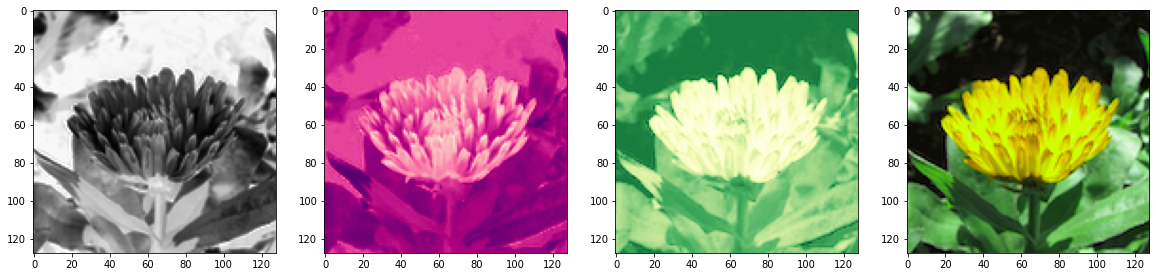

In [ ]:
smalltest1(5)

# Neural Network

In [ ]:
#create some variables
for canal in canais:
    #list with the name of the files inside the folder
    arquivo[canal + "_train"] = os.listdir( pasta[canal + "_train"] )
    arquivo[canal + "_val"] = os.listdir( pasta[canal + "_val"] )
    arquivo[canal] = os.listdir( pasta[canal] )
    print("{}:".format(canal),len(arquivo[canal + "_train"]),len(arquivo[canal + "_val"]))

L: 500 103
A: 500 103
B: 500 103


## Predict A and B channels singly

### Create a rank 4 matrix (batch_shape, rows, cols, channels)

In [ ]:
x_val_list = []
yA_val_list = []
yB_val_list = []
x_train_list = []
yA_train_list = []
yB_train_list = []

for x in arquivo["L_val"]:
    original_imagem = cv2.imread(os.path.join(pasta["L_val"],x))
    L = np.zeros((128,128,1))
    L[:,:,0] = original_imagem[:,:,0]
    x_val_list.append(L)
print("L_val")

for a in arquivo["A_val"]:
    original_imagem_a = cv2.imread(os.path.join(pasta["A_val"],a))
    A = np.zeros((128,128,1))
    A[:,:,0] = original_imagem_a[:,:,0]
    yA_val_list.append(A)
print("A_val")

for b in arquivo["B_val"]:
    original_imagem_b = cv2.imread(os.path.join(pasta["B_val"],b))
    B = np.zeros((128,128,1))
    B[:,:,0] = original_imagem_b[:,:,0]
    yB_val_list.append(B)
print("B_val")

for x in arquivo["L_train"]:
    original_imagem = cv2.imread(os.path.join(pasta["L_train"],x))
    L = np.zeros((128,128,1))
    L[:,:,0] = original_imagem[:,:,0]
    x_train_list.append(L)
print("L_train")

for a in arquivo["A_train"]:
    original_imagem_a = cv2.imread(os.path.join(pasta["A_train"],a))
    A = np.zeros((128,128,1))
    A[:,:,0] = original_imagem_a[:,:,0]
    yA_train_list.append(A)
print("A_train")

for b in arquivo["B_train"]:
    original_imagem_b = cv2.imread(os.path.join(pasta["B_train"],b))
    B = np.zeros((128,128,1))
    B[:,:,0] = original_imagem_b[:,:,0]
    yB_train_list.append(B)
print("B_train")



L_val
A_val
B_val
L_train
A_train
B_train


In [ ]:
x_train = np.array(x_train_list)
yA_train = np.array(yA_train_list)
yB_train = np.array(yB_train_list)
x_val = np.array(x_val_list)
yA_val = np.array(yA_val_list)
yB_val = np.array(yB_val_list)

print("x_train",np.min(x_train),np.max(x_train))
print("yA_train",np.min(yA_train),np.max(yA_train))
print("yB_train",np.min(yB_train),np.max(yB_train))
print("x_val",np.min(x_val),np.max(x_val))
print("yA_val",np.min(yA_val),np.max(yA_val))
print("yB_val",np.min(yB_val),np.max(yB_val))

x_train = x_train / 255.0
yA_train = yA_train / 255.0
yB_train = yB_train / 255.0
x_val = x_val / 255.0
yA_val = yA_val / 255.0
yB_val = yB_val / 255.0

print(x_train.shape)
print(yA_train.shape)
print(yB_train.shape)
print(x_val.shape)
print(yA_val.shape)
print(yB_val.shape)

x_train 0.0 255.0
yA_train 32.0 197.0
yB_train 33.0 215.0
x_val 0.0 255.0
yA_val 40.0 188.0
yB_val 38.0 207.0
(500, 128, 128, 1)
(500, 128, 128, 1)
(500, 128, 128, 1)
(103, 128, 128, 1)
(103, 128, 128, 1)
(103, 128, 128, 1)


### Model Learn

In [ ]:
modelA = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96, (3,3), activation = 'elu', padding = "same", input_shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(96, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(96, (3,3), activation = 'elu', padding = "same"),
    tf.keras.layers.LayerNormalization(axis = [1,2]),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(126, (3,3), activation = 'elu', padding = "same"),
    tf.keras.layers.Conv2D(126, (3,3), activation = 'relu', padding = "same"),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'elu', padding = "same"),

    #tf.keras.layers.MaxPooling2D(2,2), 
    #tf.keras.layers.Conv2D(512, (3,3), activation = 'sigmoid', padding = "same"),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),

    #tf.keras.layers.MaxPooling2D(2,2),

    #tf.keras.layers.UpSampling2D((2,2)),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),

    #tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(40, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(20, (3,3), activation = 'elu', padding = "same"),
    tf.keras.layers.LayerNormalization(axis = [1,2]),
    tf.keras.layers.Conv2D(20, (3,3), activation = 'elu', padding = "same"),
    tf.keras.layers.Conv2D(1, (3,3), activation = 'tanh', padding = "same")  
])

modelA.compile(
    optimizer = "Adam",
    loss = "MSE",
    metrics = ['MSLE'])

historyA = modelA.fit(
    x = x_train,
    y = yA_train,
    validation_data = (x_val,yA_val),
    batch_size = 5,
    steps_per_epoch = 100,
    epochs = 3)

Epoch 1/3
100/100 [==============================] - 5s 46ms/step - loss: 0.0381 - MSLE: 0.0135 - val_loss: 0.0251 - val_MSLE: 0.0118
Epoch 2/3
100/100 [==============================] - 4s 44ms/step - loss: 0.0125 - MSLE: 0.0058 - val_loss: 0.0093 - val_MSLE: 0.0045
Epoch 3/3
100/100 [==============================] - 4s 44ms/step - loss: 0.0100 - MSLE: 0.0047 - val_loss: 0.0117 - val_MSLE: 0.0054


In [ ]:
modelB = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96, (3,3), activation = 'elu', padding = "same", input_shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(96, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(96, (3,3), activation = 'elu', padding = "same"),
    tf.keras.layers.LayerNormalization(axis = [1,2]),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(126, (3,3), activation = 'elu', padding = "same"),
    tf.keras.layers.Conv2D(126, (3,3), activation = 'relu', padding = "same"),
    #tf.keras.layers.Conv2D(126, (3,3), activation = 'elu', padding = "same"),

    #tf.keras.layers.MaxPooling2D(2,2), 
    #tf.keras.layers.Conv2D(96, (3,3), activation = 'relu', padding = "same"), 
    #tf.keras.layers.LayerNormalization(axis = [1,2]),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),

    #tf.keras.layers.MaxPooling2D(2,2),

    #tf.keras.layers.UpSampling2D((2,2)),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),
    #tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = "same"),

    #tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(96, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(40, (3,3), activation = 'elu', padding = "same"),
    tf.keras.layers.LayerNormalization(axis = [1,2]),
    tf.keras.layers.Conv2D(20, (3,3), activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(20, (3,3), activation = 'elu', padding = "same"),
    tf.keras.layers.Conv2D(1, (3,3), activation = 'tanh', padding = "same") 
])

modelB.compile(
    optimizer = "Adam",
    loss = "MSLE",
    metrics = ['MSLE'])

historyB = modelB.fit(
    x = x_train,
    y = yB_train,
    validation_data = (x_val,yB_val),
    batch_size = 5,
    steps_per_epoch = 100,
    epochs = 5)

Epoch 1/5
100/100 [==============================] - 5s 55ms/step - loss: 0.0159 - MSLE: 0.0159 - val_loss: 0.0050 - val_MSLE: 0.0050
Epoch 2/5
100/100 [==============================] - 5s 52ms/step - loss: 0.0052 - MSLE: 0.0052 - val_loss: 0.0055 - val_MSLE: 0.0055
Epoch 3/5
100/100 [==============================] - 5s 52ms/step - loss: 0.0048 - MSLE: 0.0048 - val_loss: 0.0054 - val_MSLE: 0.0054
Epoch 4/5
100/100 [==============================] - 5s 53ms/step - loss: 0.0049 - MSLE: 0.0049 - val_loss: 0.0052 - val_MSLE: 0.0052
Epoch 5/5
100/100 [==============================] - 5s 53ms/step - loss: 0.0051 - MSLE: 0.0051 - val_loss: 0.0052 - val_MSLE: 0.0052


### Middle Layers

In [ ]:
def middle(n,ab):
    if ab == "A":
        model = modelA
    if ab == "B":
        model = modelB
    # Let's define a new Model that will take an image as input, and will output
    # intermediate representations for all layers in the previous model after
    # the first.
    successive_outputs = [layer.output for layer in model.layers[1:-1]]
    #visualization_model = Model(img_input, successive_outputs)
    visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
    # Let's prepare a random input image from the training set.

    L_imagem = x_val[n,:,:,0]
    L_imagem = np.reshape(L_imagem,(1,128,128,1))

    # Rescale by 1/255
    x = L_imagem / 255

    # Let's run our image through our network, thus obtaining all
    # intermediate representations for this image.
    successive_feature_maps = visualization_model.predict(x)

    # These are the names of the layers, so can have them as part of our plot
    layer_names = [layer.name for layer in model.layers[1:-1]]

    # Now let's display our representations
    for layer_name, feature_map in zip(layer_names, successive_feature_maps):
        if len(feature_map.shape) == 4:
            # Just do this for the conv / maxpool layers, not the fully-connected layers
            n_features = feature_map.shape[-1]  # number of features in feature map
            # The feature map has shape (1, size, size, n_features)
            size = feature_map.shape[1]
            # We will tile our images in this matrix
            display_grid = np.zeros((size, size * n_features))
            for i in range(n_features):
                # Postprocess the feature to make it visually palatable
                x = feature_map[0, :, :, i]
                x -= x.mean()
                x /= x.std()
                x *= 64
                x += 128
                x = np.clip(x, 0, 255).astype('uint8')
                # We'll tile each filter into this big horizontal grid
                display_grid[:, i * size : (i + 1) * size] = x
            # Display the grid
            scale = 20. / n_features
            plt.figure(figsize=(scale * n_features, scale))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
def predict(n,trainORval):
    if trainORval == "train":
        L_imagem = x_train[n,:,:,0]
    if trainORval == "val":
        L_imagem = x_val[n,:,:,0]

    L_imagem = L_imagem 
    L_imagem = np.reshape(L_imagem,(1,128,128,1))

    A_imagem = modelA.predict(L_imagem)
    B_imagem = modelB.predict(L_imagem)

    L_imagem = L_imagem * 255.0
    A_imagem = A_imagem * 255.0
    B_imagem = B_imagem * 255.0 

    L_imagem = np.reshape(L_imagem,(128,128))
    A_imagem = np.reshape(A_imagem,(128,128))
    B_imagem = np.reshape(B_imagem,(128,128))

    reLAB_imagem = np.zeros((128,128,3))
    reLAB_imagem[:,:,0] = L_imagem 
    reLAB_imagem[:,:,2] = A_imagem
    reLAB_imagem[:,:,1] = B_imagem

    print("L_predict | MAX: {:^3.0f} | MIN: {:^3.0f} | Mean: {:>6.2f} | Std: {:>6.2f}".format(np.max(L_imagem),np.min(L_imagem),np.mean(L_imagem),np.std(L_imagem)))
    print("A_predict | MAX: {:^3.0f} | MIN: {:^3.0f} | Mean: {:>6.2f} | Std: {:>6.2f}".format(np.max(A_imagem),np.min(A_imagem),np.mean(A_imagem),np.std(A_imagem)))
    print("B_predict | MAX: {:^3.0f} | MIN: {:^3.0f} | Mean: {:>6.2f} | Std: {:>6.2f}".format(np.max(B_imagem),np.min(B_imagem),np.mean(B_imagem),np.std(B_imagem)))
    
    reLAB_imagem = np.uint8(reLAB_imagem)
    reRGB_imagem = cv2.cvtColor(reLAB_imagem, cv2.COLOR_LAB2BGR)

    fig = plt.figure(figsize = (20, 20))
    
    L_imagem = 255 - L_imagem
    fig.add_subplot(1, 4, 1)
    plt.imshow(L_imagem, cmap = plt.cm.binary)
    fig.add_subplot(1, 4, 2)
    plt.imshow(A_imagem, cmap = plt.cm.RdPu)
    fig.add_subplot(1, 4, 3)
    plt.imshow(B_imagem, cmap = plt.cm.YlGn)
    fig.add_subplot(1, 4, 4)
    plt.imshow(reRGB_imagem)
    plt.show

In [ ]:
def test2(n,trainORval):
    if trainORval == "train":
        L_imagem = x_train[n,:,:,0]
        A_imagem = yA_train[n,:,:,0]
        B_imagem = yB_train[n,:,:,0]
    if trainORval == "val":
        L_imagem = x_val[n,:,:,0]
        A_imagem = yA_val[n,:,:,0]
        B_imagem = yB_val[n,:,:,0]

    L_imagem = np.reshape(L_imagem,(128,128))
    A_imagem = np.reshape(A_imagem, (128,128))
    B_imagem = np.reshape(B_imagem, (128,128))

    L_imagem = L_imagem * 255.0
    A_imagem = A_imagem * 255.0
    B_imagem = B_imagem * 255.0

    reLAB_imagem = np.zeros((128,128,3))
    reLAB_imagem[:,:,0] = L_imagem 
    reLAB_imagem[:,:,2] = A_imagem
    reLAB_imagem[:,:,1] = B_imagem

    print("L_test    | MAX: {:^3.0f} | MIN: {:^3.0f} | Mean: {:>6.2f} | Std: {:>6.2f}".format(np.max(L_imagem),np.min(L_imagem),np.mean(L_imagem),np.std(L_imagem)))
    print("A_test    | MAX: {:^3.0f} | MIN: {:^3.0f} | Mean: {:>6.2f} | Std: {:>6.2f}".format(np.max(A_imagem),np.min(A_imagem),np.mean(A_imagem),np.std(A_imagem)))
    print("B_test    | MAX: {:^3.0f} | MIN: {:^3.0f} | Mean: {:>6.2f} | Std: {:>6.2f}".format(np.max(B_imagem),np.min(B_imagem),np.mean(B_imagem),np.std(B_imagem)))

    reLAB_imagem = np.uint8(reLAB_imagem)
    reRGB_imagem = cv2.cvtColor(reLAB_imagem, cv2.COLOR_LAB2BGR)

    fig = plt.figure(figsize = (20, 20))

    L_imagem = 255 - L_imagem
    fig.add_subplot(1, 4, 1)
    plt.imshow(L_imagem, cmap = plt.cm.binary)
    fig.add_subplot(1, 4, 2)
    plt.imshow(A_imagem, cmap = plt.cm.RdPu)
    fig.add_subplot(1, 4, 3)
    plt.imshow(B_imagem, cmap = plt.cm.YlGn)
    fig.add_subplot(1, 4, 4)
    plt.imshow(reRGB_imagem)
    plt.show

### Results

69
L_predict | MAX: 255 | MIN:  0  | Mean:  84.52 | Std:  89.04
A_predict | MAX: 180 | MIN: 87  | Mean: 129.89 | Std:  21.56
B_predict | MAX: 145 | MIN: 90  | Mean: 109.90 | Std:   9.37
L_test    | MAX: 255 | MIN:  0  | Mean:  84.52 | Std:  89.04
A_test    | MAX: 147 | MIN: 101 | Mean: 127.74 | Std:   2.24
B_test    | MAX: 165 | MIN: 53  | Mean: 124.75 | Std:   5.83
23
L_predict | MAX: 255 | MIN:  0  | Mean: 138.28 | Std:  64.56
A_predict | MAX: 212 | MIN: 72  | Mean: 131.12 | Std:  12.10
B_predict | MAX: 134 | MIN: 83  | Mean: 107.82 | Std:  10.70
L_test    | MAX: 255 | MIN:  0  | Mean: 138.28 | Std:  64.56
A_test    | MAX: 176 | MIN: 54  | Mean: 121.06 | Std:  38.91
B_test    | MAX: 162 | MIN: 45  | Mean: 101.89 | Std:  20.26


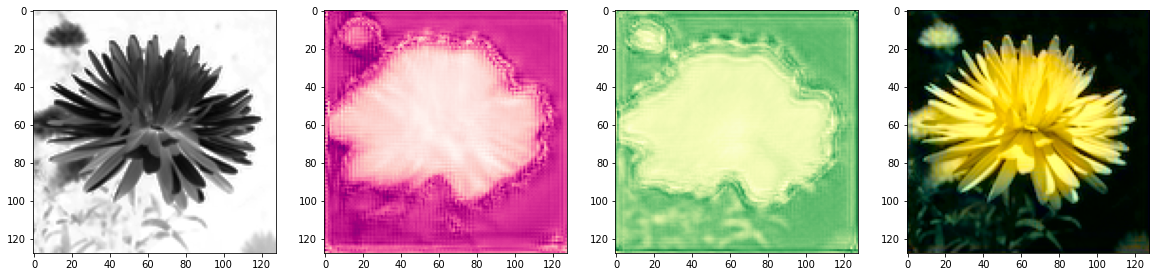

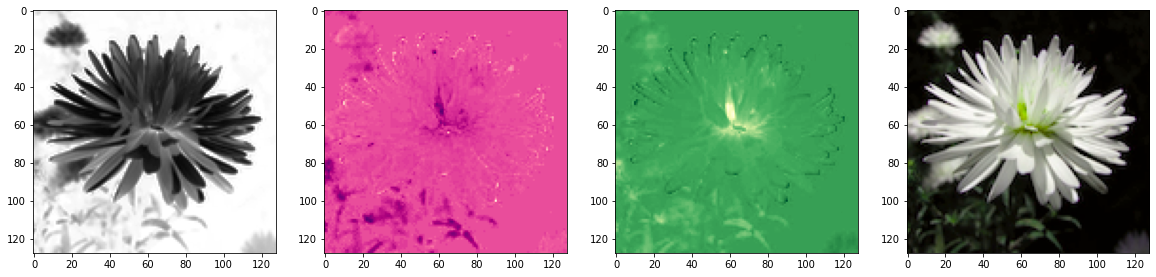

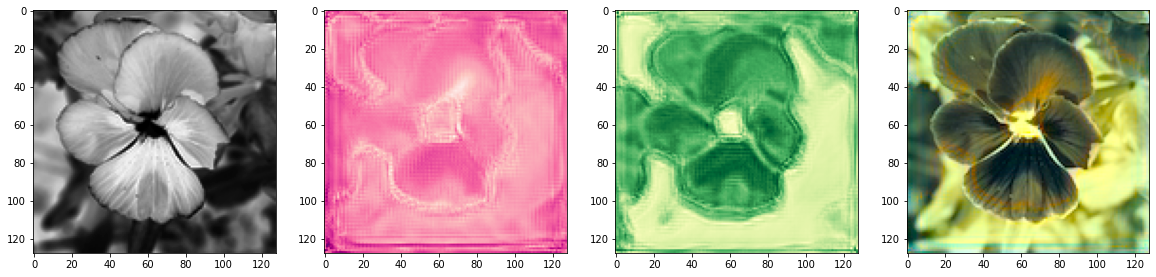

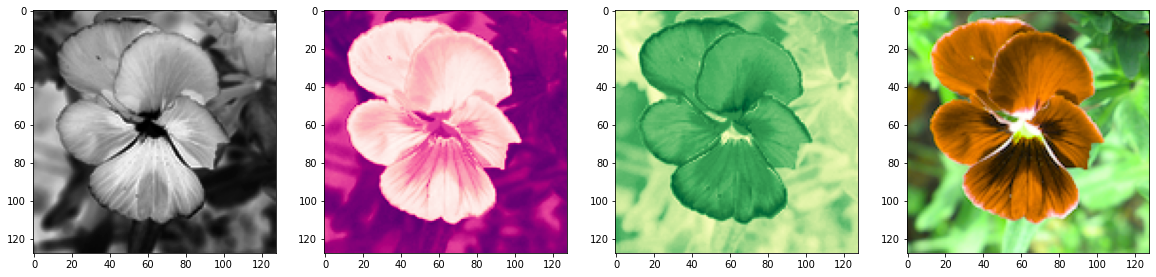

In [ ]:
for a in range(0,2):
    i = random.choice(range(0,len(arquivo["L_val"])))
    print(i)
    predict(i,"val")
    test2(i,"val")

80
L_predict | MAX: 255 | MIN:  0  | Mean: 100.98 | Std:  59.49
A_predict | MAX: 188 | MIN: 76  | Mean: 124.03 | Std:  25.46
B_predict | MAX: 136 | MIN: 79  | Mean: 105.51 | Std:  11.99
421
L_predict | MAX: 243 | MIN: 16  | Mean: 134.38 | Std:  39.17
A_predict | MAX: 212 | MIN: 64  | Mean: 124.50 | Std:  28.57
B_predict | MAX: 139 | MIN: 73  | Mean: 103.51 | Std:  13.58
166
L_predict | MAX: 255 | MIN:  0  | Mean: 138.00 | Std:  41.22
A_predict | MAX: 186 | MIN: 58  | Mean: 127.57 | Std:  29.20
B_predict | MAX: 148 | MIN: 78  | Mean: 104.54 | Std:  13.08
358
L_predict | MAX: 255 | MIN:  0  | Mean:  80.63 | Std:  80.28
A_predict | MAX: 172 | MIN: 91  | Mean: 132.44 | Std:  16.03
B_predict | MAX: 140 | MIN: 85  | Mean: 109.82 | Std:   7.93


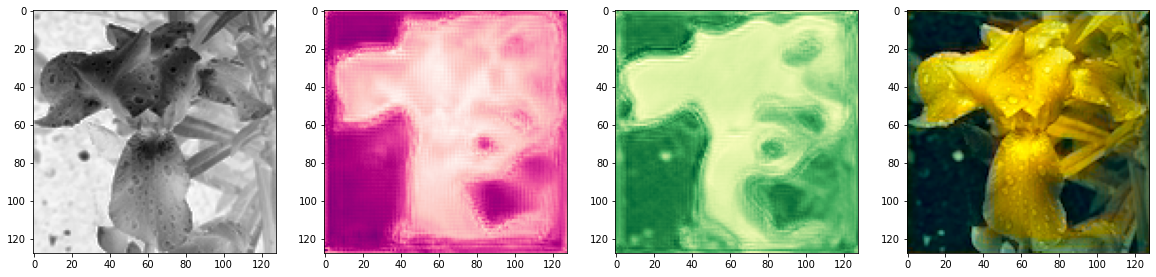

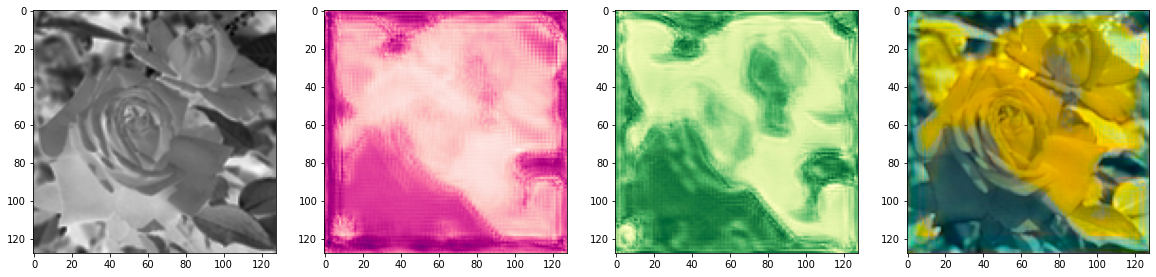

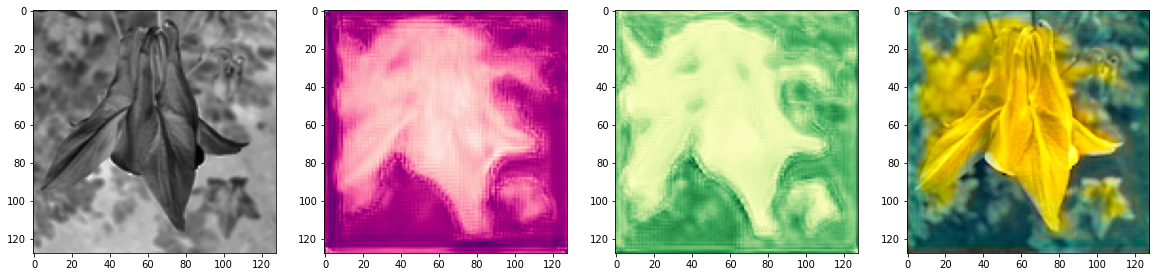

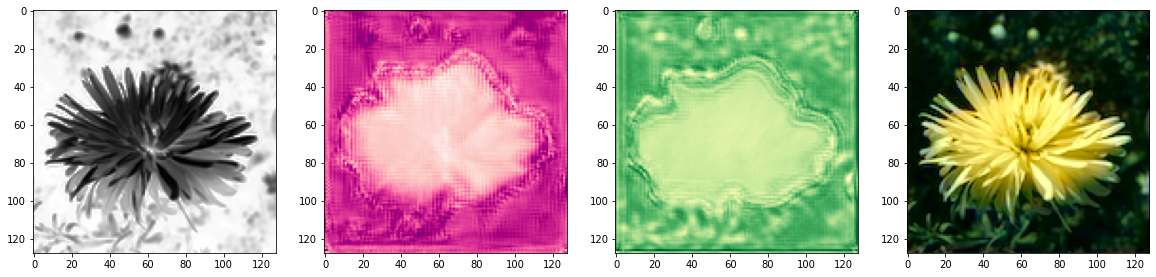

In [ ]:
for a in range(0,4):
    i = random.choice(range(0,len(arquivo["L_train"])))
    print(i)
    predict(i,"train")
    #test2(i,"train")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


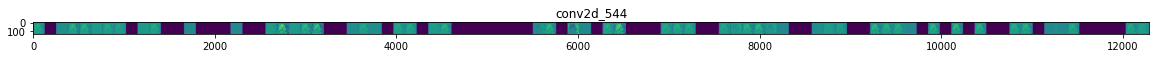

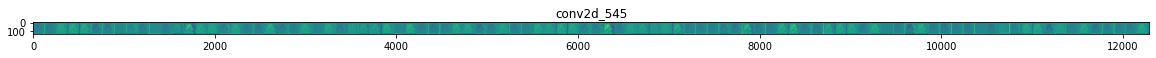

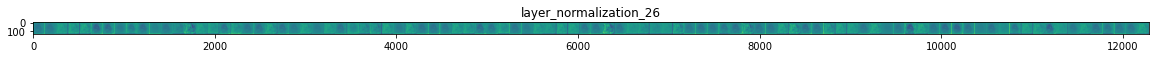

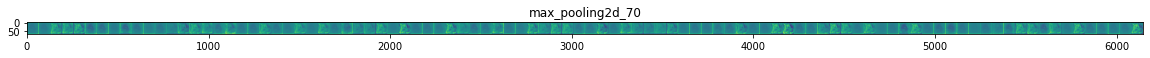

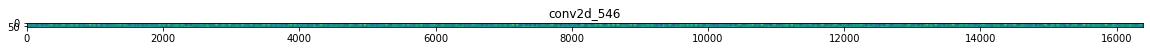

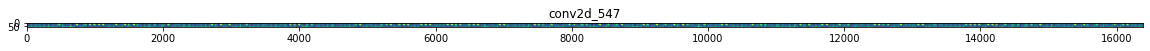

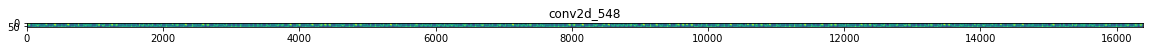

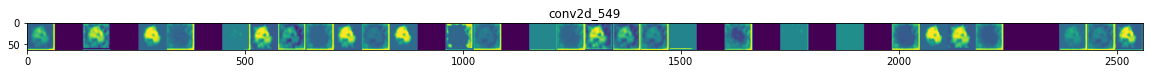

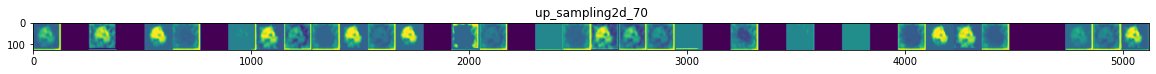

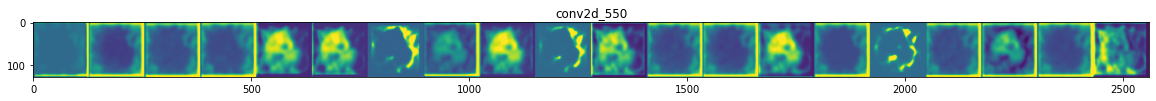

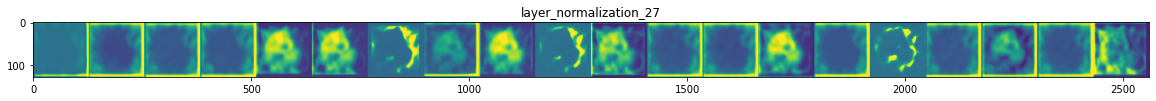

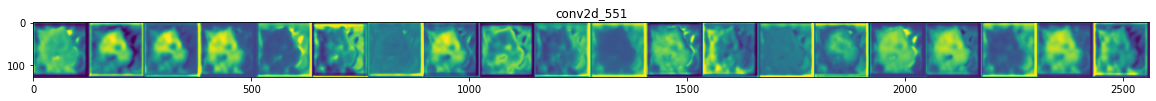

In [ ]:
middle(3,"A")

### Final Results

76
L_predict | MAX: 255 | MIN:  0  | Mean:  83.74 | Std:  88.59
A_predict | MAX: 182 | MIN: 86  | Mean: 130.71 | Std:  18.25
B_predict | MAX: 145 | MIN: 90  | Mean: 109.73 | Std:   8.80
79
L_predict | MAX: 255 | MIN:  0  | Mean:  87.39 | Std:  67.48
A_predict | MAX: 179 | MIN: 89  | Mean: 131.14 | Std:  18.77
B_predict | MAX: 143 | MIN: 92  | Mean: 109.68 | Std:   9.38
71
L_predict | MAX: 229 | MIN:  0  | Mean: 106.68 | Std:  84.00
A_predict | MAX: 200 | MIN: 88  | Mean: 129.43 | Std:  24.63
B_predict | MAX: 142 | MIN: 89  | Mean: 109.29 | Std:  10.52
13
L_predict | MAX: 223 | MIN:  0  | Mean:  91.72 | Std:  71.60
A_predict | MAX: 203 | MIN: 93  | Mean: 132.14 | Std:  17.12
B_predict | MAX: 144 | MIN: 93  | Mean: 109.87 | Std:   8.87


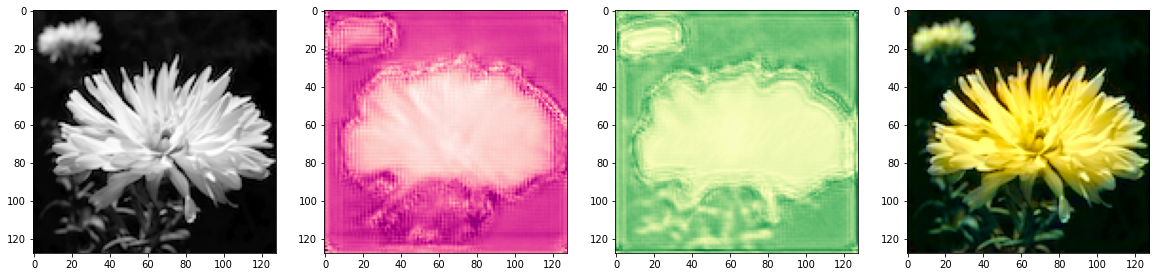

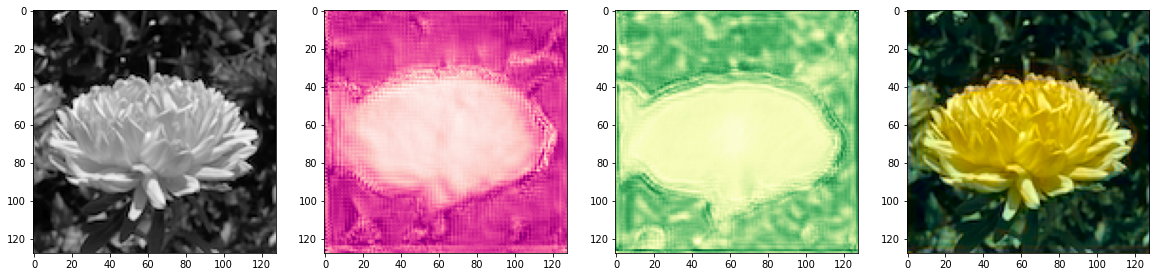

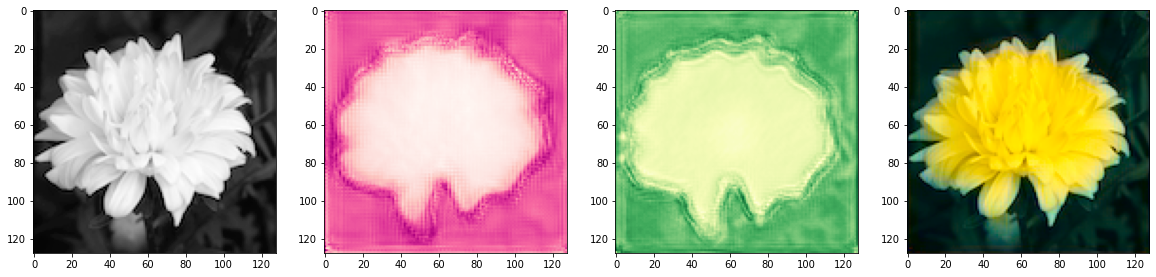

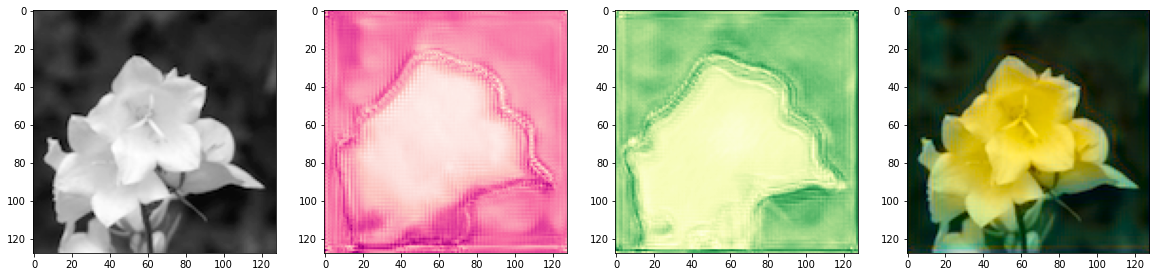

In [ ]:
lista = [3,5,8,9,13,22,27,31,40,44,52,57,58,60,62,64,67,69,71,75,76,79,86,102] #bons
#lista = [14,16,20,25,26,38,43,48,50,65,82,91] #ruins
i = random.sample(lista,4)
for a in i:
    print(a)
    predict(a,"val")